# Simple Analysis of IPL 2008-2020
#### **By Ika Nurfitriani**

## About Dataset
IPL is among the most famous cricket league with players coming from worldwide. What makes this series more competitive every year is the drama with every ball and hence this dataset is a complete dataset showing match information and also data for each delivery.<br>
1. The file IPL_Matches_2008-2020.csv contains all details of the match: Venue of the match, Toss Decision, Match Winer, Man of the Match, Squads, etc.
2. The file IPL_Ball-by-Ball_2008-2020.csv contains ball by ball data of each and every match: Batsman on strike, Bowler, Extras, Runs, Wicket Ball, etc.

# A. Import library
***

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# B. Data Loading
***

**Membaca dataset**

In [192]:
df_match = pd.read_csv("IPL_Matches_2008-2020.csv")
df_ball = pd.read_csv("IPL_Ball-by-Ball_2008-2020.csv")

**Melihat 5 data teratas dari df_match**

In [193]:
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


**Melihat 5 data teratas dari df_ball**

In [194]:
df_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


**Melihat tipe data semua kolom**

In [195]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

**Melihat tipe data semua kolom**

In [196]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

**Melihat informasi dimensi dari dataset**

In [197]:
rows, columns = df_match.shape
print("Dimensi data match:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data match:
816 baris
17 kolom


**Melihat nama-nama kolom dari dataframe**

In [198]:
df_match.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

**Melihat banyaknya nilai dari setiap atribut**

In [199]:
for col in df_match.columns:
    print(col, ': ')
    print(df_match[col].value_counts())
    print('-'*60)

id : 
335982     1
980963     1
980943     1
980945     1
980947     1
          ..
548332     1
548333     1
548334     1
548335     1
1237181    1
Name: id, Length: 816, dtype: int64
------------------------------------------------------------
city : 
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64
-----------------

**Melihat informasi dimensi dari dataset**

In [200]:
rows, columns = df_ball.shape
print("Dimensi data ball:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data ball:
193468 baris
18 kolom


**Melihat nama-nama kolom dari dataframe**

In [201]:
df_ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

**Melihat banyaknya nilai dari setiap atribut**

In [202]:
for col in df_ball.columns:
    print(col, ': ')
    print(df_ball[col].value_counts())
    print('-'*40)

id : 
829737     262
829811     259
1216522    259
1178423    257
419142     257
          ... 
392183     108
829807     106
598068     100
501265      63
1178424     51
Name: id, Length: 816, dtype: int64
----------------------------------------
inning : 
1    100191
2     93277
Name: inning, dtype: int64
----------------------------------------
over : 
1     10255
0     10254
2     10155
3     10115
4     10092
5     10067
6     10021
7      9993
8      9964
9      9920
10     9864
11     9833
12     9806
13     9712
14     9638
15     9477
16     9358
17     9086
18     8531
19     7327
Name: over, dtype: int64
----------------------------------------
ball : 
1    31372
2    31285
3    31200
4    31129
5    31032
6    30929
7     5521
8      865
9      135
Name: ball, dtype: int64
----------------------------------------
batsman : 
V Kohli           4609
S Dhawan          4208
RG Sharma         4088
SK Raina          4041
DA Warner         3819
                  ... 
DP Vijaykumar 

**Melihat deskripsi statistik dasar dari df_match**

In [203]:
df_match.describe().T

,count,mean,std,min,25%,50%,75%,max
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0
result_margin,799.0,17.321652,22.068427,1.0,6.00,8.0,19.50,146.0


**Melihat deskripsi statistik dasar dari df_ball**

In [204]:
df_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193468.0,756768.808439,306097.091418,335982.0,501227.0,729297.0,1082628.0,1237181.0
inning,193468.0,1.482131,0.499682,1.0,1.0,1.0,2.0,2.0
over,193468.0,9.177027,5.676848,0.0,4.0,9.0,14.0,19.0
ball,193468.0,3.615967,1.807128,1.0,2.0,4.0,5.0,9.0
batsman_runs,193468.0,1.240231,1.610867,0.0,0.0,1.0,1.0,6.0
extra_runs,193468.0,0.066414,0.339991,0.0,0.0,0.0,0.0,7.0
total_runs,193468.0,1.306645,1.598802,0.0,0.0,1.0,1.0,7.0
non_boundary,193468.0,0.000083,0.009094,0.0,0.0,0.0,0.0,1.0
is_wicket,193468.0,0.049078,0.216031,0.0,0.0,0.0,0.0,1.0


# C. Data Cleaning
***

**Melihat jumlah data yang unik dari df_ball**

In [205]:
df_ball.nunique()

id                  816
inning                2
over                 20
ball                  9
batsman             537
non_striker         530
bowler              420
batsman_runs          7
extra_runs            7
total_runs            8
non_boundary          2
is_wicket             2
dismissal_kind        9
player_dismissed    506
fielder             879
extras_type           5
batting_team         15
bowling_team         15
dtype: int64

**Mengecek missing values dari df_ball**

In [206]:
df_ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

**Mengganti nilai missing values dalam df_ball dengan Unknown**

In [207]:
df_ball["dismissal_kind"] = df_ball["dismissal_kind"].fillna("unknown")
df_ball["player_dismissed"] = df_ball["player_dismissed"].fillna("unknown")
df_ball["fielder"] = df_ball["fielder"].fillna("unknown")
df_ball["extras_type"] = df_ball["extras_type"].fillna("unknown")
df_ball["bowling_team"] = df_ball["bowling_team"].fillna("unknown")

**Mengecek kembali missing values dari df_ball**

In [208]:
df_ball.isnull().sum()

id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64

**Melihat jumlah data yang unik dari df_match**

In [209]:
df_match.nunique()

id                 816
city                32
date               596
player_of_match    233
venue               36
neutral_venue        2
team1               15
team2               15
toss_winner         15
toss_decision        2
winner              15
result               3
result_margin       91
eliminator           2
method               1
umpire1             48
umpire2             47
dtype: int64

**Mengecek missing values dari df_match**

In [210]:
df_match.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

**Mengganti nilai missing values dalam df_match dengan Unknown**

In [211]:
df_match["city"] = df_match["city"].fillna("unknown")
df_match["player_of_match"] = df_match["player_of_match"].fillna("unknown")
df_match["winner"] = df_match["winner"].fillna("unknown")
df_match["result"] = df_match["result"].fillna("unknown")
df_match["eliminator"] = df_match["eliminator"].fillna("unknown")
df_match["method"] = df_match["method"].fillna("unknown")

df_match["result_margin"].fillna(value=df_match["result_margin"].median(), inplace=True)

**Mengecek kembali missing values dari df_match**

In [212]:
df_match.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

**Mengecek data duplikat**

In [213]:
print("Jumlah duplicated data dari df_ball =", df_ball.duplicated().sum())
print("Jumlah duplicated data dari df_match =", df_match.duplicated().sum())

Jumlah duplicated data dari df_ball = 1
Jumlah duplicated data dari df_match = 0


**Menghapus data duplikat**

In [214]:
df_ball.drop_duplicates(subset=df_ball.columns, keep='first', inplace=True)

**Mengecek kembali data duplikat**

In [215]:
print("Jumlah duplicated data dari df_ball =", df_ball.duplicated().sum())
print("Jumlah duplicated data dari df_match =", df_match.duplicated().sum())

Jumlah duplicated data dari df_ball = 0
Jumlah duplicated data dari df_match = 0


**Melihat kembali informasi dimensi dari df_ball**

In [216]:
rows, columns = df_ball.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
193467 baris
18 kolom


**Melihat kembali informasi dimensi dari df_match**

In [217]:
rows, columns = df_match.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
816 baris
17 kolom


# D. Exploratory Data Analysis (EDA)
***

**Melihat distribusi pada kolom numerik dari df_ball**

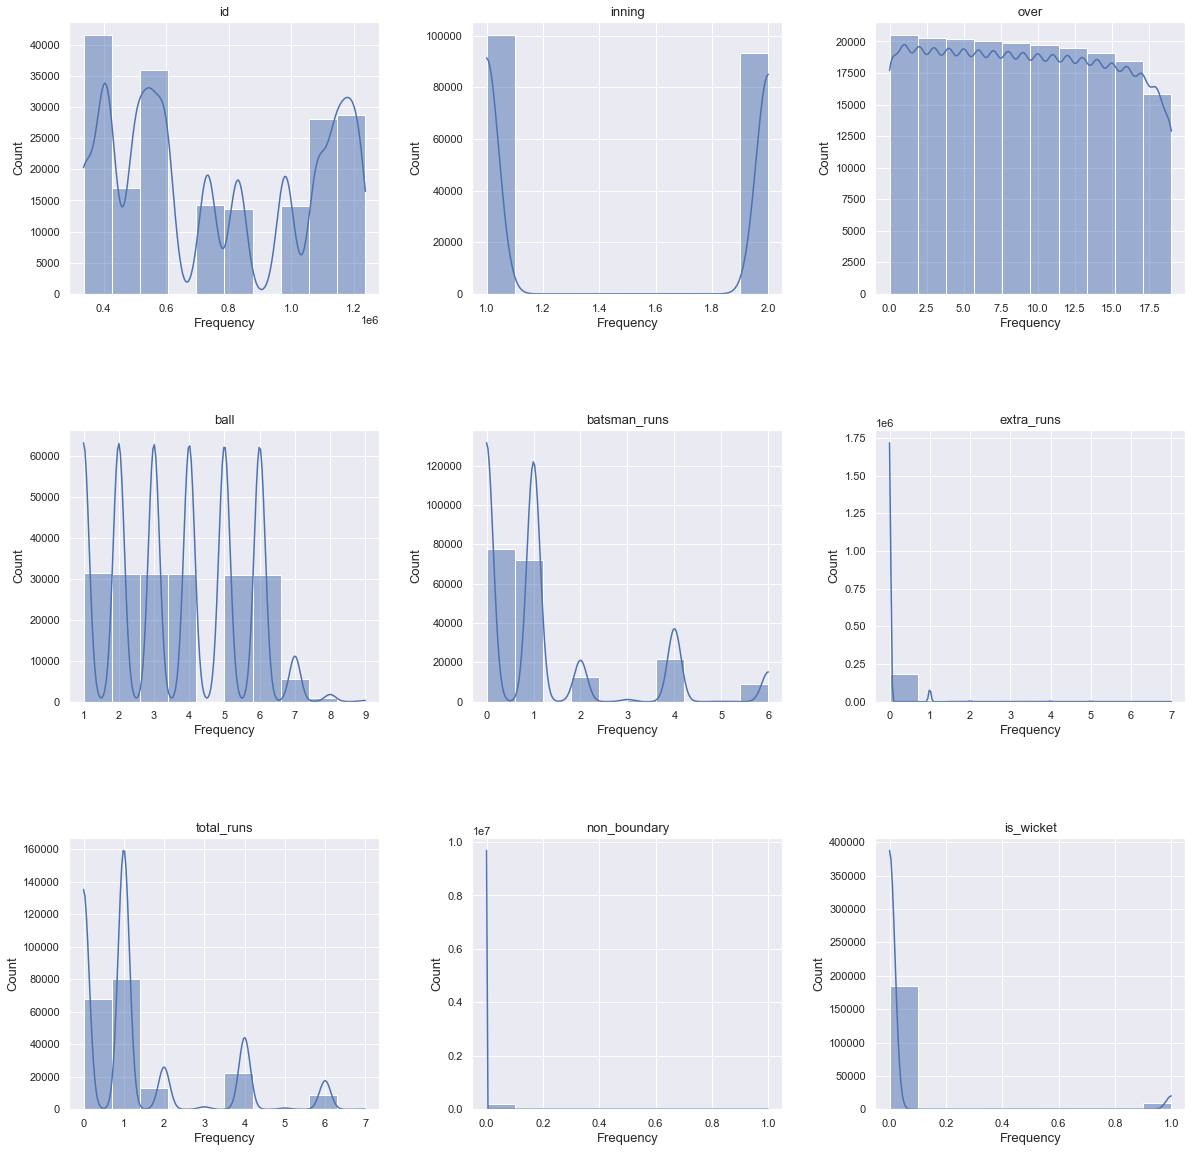

In [218]:
df_1 = df_ball
num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))
for i, col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df_1, x=col, bins=10, kde=True)

**Melihat distribusi pada kolom numerik dari df_match**

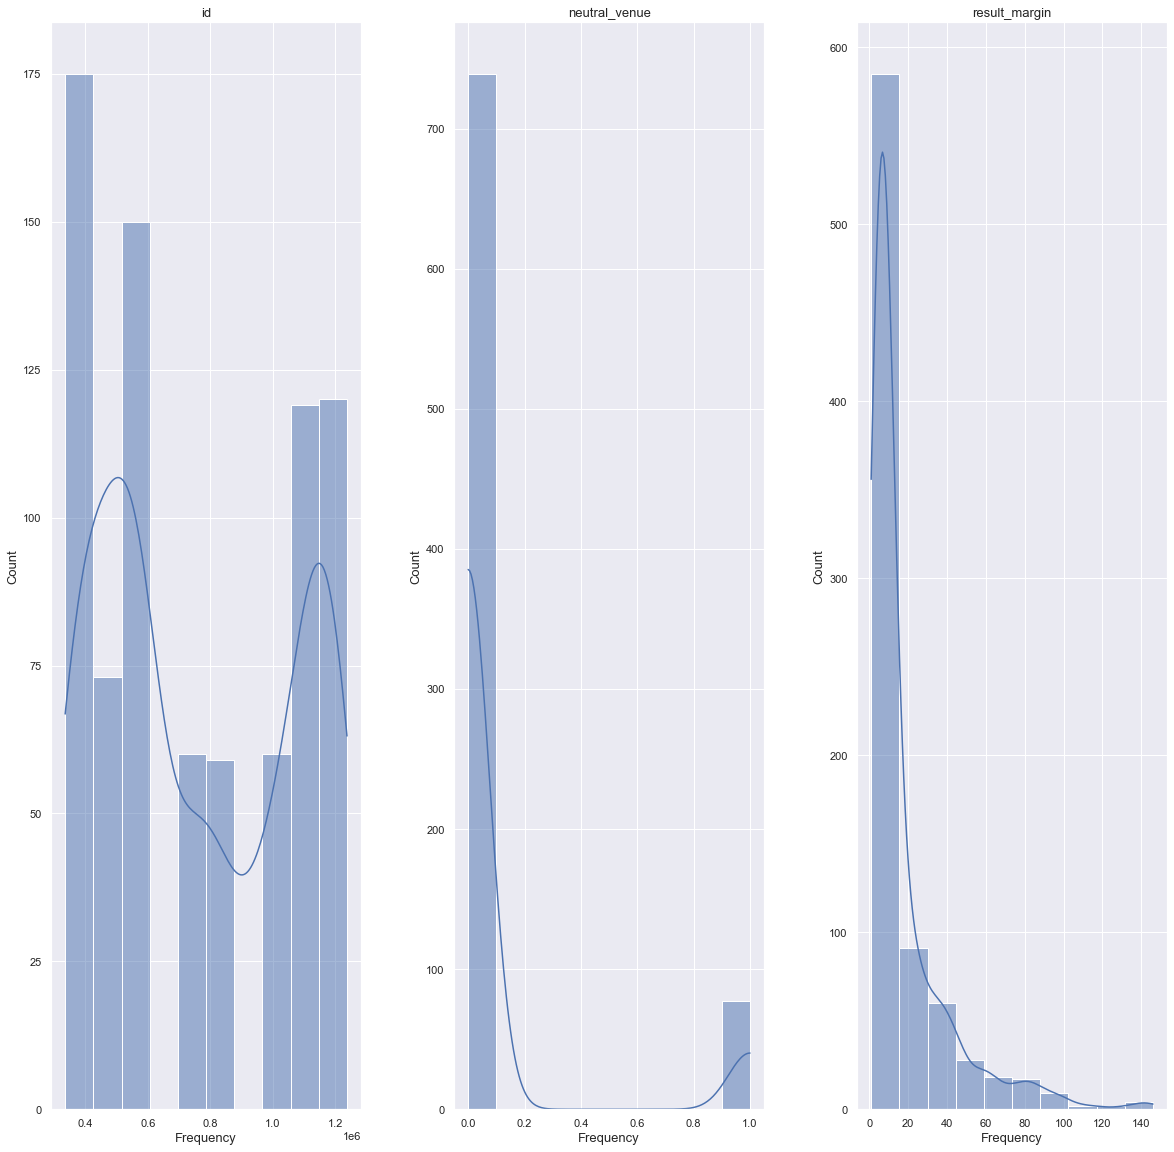

In [219]:
df_2 = df_match
num_cols2 = df_2.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))
for i, col in enumerate(num_cols2):
    plt.subplot(1,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df_2, x=col, bins=10, kde=True)

## Melihat Measure of Central Tedency dan Measured of Spread dari df_ball

In [220]:
def numEDA_ball():
    df_3 = df_ball
    numBall_cols = df_3.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in numBall_cols:
        print(f"Nilai Minimum dari {col}         = {df_ball[col].min()}")
        print(f"Nilai Rata-Rata dari {col}       = {df_ball[col].mean()}")
        print(f"Nilai Median dari {col}          = {df_ball[col].median()}")
        print(f"Nilai Standar Deviasi dari {col} = {df_ball[col].std()}")
        print(f"Nilai Variance dari {col}        = {df_ball[col].var()}")
        print(f"Nilai Maximum dari {col}         = {df_ball[col].max()}")
        print(f"Nilai Range dari {col}           = {df_ball[col].max()-df_ball[col].min()} \n")
numEDA_ball()

Nilai Minimum dari id         = 335982
Nilai Rata-Rata dari id       = 756770.5535259243
Nilai Median dari id          = 729297.0
Nilai Standar Deviasi dari id = 306096.9201031315
Nilai Variance dari id        = 93695324496.62286
Nilai Maximum dari id         = 1237181
Nilai Range dari id           = 901199 

Nilai Minimum dari inning         = 1
Nilai Rata-Rata dari inning       = 1.4821339039732875
Nilai Median dari inning          = 1.0
Nilai Standar Deviasi dari inning = 0.49968199205008157
Nilai Variance dari inning        = 0.24968209317913778
Nilai Maximum dari inning         = 2
Nilai Range dari inning           = 1 

Nilai Minimum dari over         = 0
Nilai Rata-Rata dari over       = 9.1770586198163
Nilai Median dari over          = 9.0
Nilai Standar Deviasi dari over = 5.676845195318358
Nilai Variance dari over        = 32.226571371609126
Nilai Maximum dari over         = 19
Nilai Range dari over           = 19 

Nilai Minimum dari ball         = 1
Nilai Rata-Rata dari ball

## Melihat Measure of Central Tedency dan Measured of Spread dari df_match

In [221]:
def numEDA_match():
    df_4 = df_match
    numMatch_cols = df_4.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in numMatch_cols:
        print(f"Nilai Minimum dari {col}         = {df_match[col].min()}")
        print(f"Nilai Rata-Rata dari {col}       = {df_match[col].mean()}")
        print(f"Nilai Median dari {col}          = {df_match[col].median()}")
        print(f"Nilai Standar Deviasi dari {col} = {df_match[col].std()}")
        print(f"Nilai Variance dari {col}        = {df_match[col].var()}")
        print(f"Nilai Maximum dari {col}         = {df_match[col].max()}")
        print(f"Nilai Range dari {col}           = {df_match[col].max()-df_match[col].min()} \n")
numEDA_match()

Nilai Minimum dari id         = 335982
Nilai Rata-Rata dari id       = 756349.5539215687
Nilai Median dari id          = 729298.0
Nilai Standar Deviasi dari id = 305894.25480400526
Nilai Variance dari id        = 93571295122.0977
Nilai Maximum dari id         = 1237181
Nilai Range dari id           = 901199 

Nilai Minimum dari neutral_venue         = 0
Nilai Rata-Rata dari neutral_venue       = 0.09436274509803921
Nilai Median dari neutral_venue          = 0.0
Nilai Standar Deviasi dari neutral_venue = 0.2925120072569815
Nilai Variance dari neutral_venue        = 0.0855632743895084
Nilai Maximum dari neutral_venue         = 1
Nilai Range dari neutral_venue           = 1 

Nilai Minimum dari result_margin         = 1.0
Nilai Rata-Rata dari result_margin       = 17.127450980392158
Nilai Median dari result_margin          = 8.0
Nilai Standar Deviasi dari result_margin = 21.877650446913876
Nilai Variance dari result_margin        = 478.63158907735095
Nilai Maximum dari result_margin      

In [222]:
print('Matchs played so far:', df_match.shape[0])
print('\nCities played at:', df_match['city'].unique())
print('\nTeams participated:', df_match['team1'].unique())

Matchs played so far: 816

Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'unknown' 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

Teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [223]:
df_match['Season'] = pd.DatetimeIndex(df_match['date']).year
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,unknown,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,unknown,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,unknown,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,unknown,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,unknown,BF Bowden,K Hariharan,2008


In [224]:
match_per_season = df_match.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


## Total Matches Played in Each Season

Text(0.5, 1.0, 'Total matches played in each season')

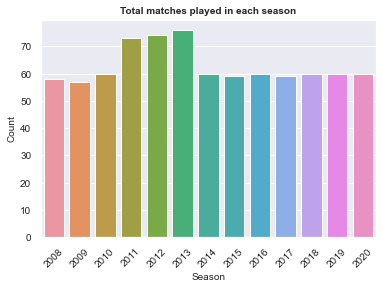

In [225]:
sns.countplot(df_match['Season'])
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total matches played in each season', fontsize=10, fontweight='bold')

In [226]:
season_data=df_match[['id','Season']].merge(df_ball, left_on='id', right_on='id', how='left').drop('id', axis=1)

In [227]:
season_data

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,unknown,unknown,unknown,unknown,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,unknown,unknown,unknown,unknown,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,unknown,unknown,unknown,unknown,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,unknown,unknown,unknown,unknown,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,unknown,unknown,unknown,unknown,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193462,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,unknown,unknown,unknown,unknown,Delhi Capitals,Mumbai Indians
193463,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,unknown,unknown,unknown,unknown,Delhi Capitals,Mumbai Indians
193464,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,unknown,unknown,unknown,wides,Delhi Capitals,Mumbai Indians
193465,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,unknown,unknown,unknown,unknown,Delhi Capitals,Mumbai Indians


## Total Runs in Each Season

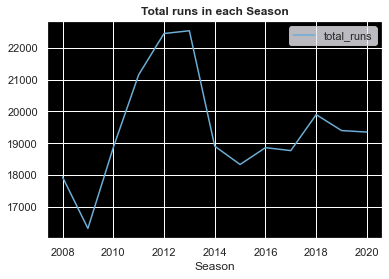

In [228]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax = plt.axes()
ax.set(facecolor='black')
sns.lineplot(data=p, palette='Blues_r')
plt.title('Total runs in each Season', fontsize=12, fontweight='bold')
plt.show()

In [229]:
runs_per_season = pd.concat([match_per_season, season.iloc[:,1]], axis=1)
runs_per_season['Runs scored per match'] = runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season', inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18863,314.383333
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


## Number of Tosses Won by Each Team

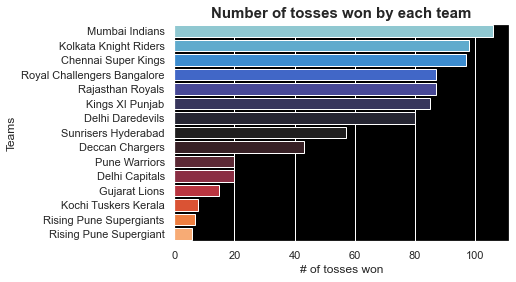

In [230]:
toss = df_match['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor='black')
sns.set(rc={'figure.figsize':(15,10)}, style='darkgrid')
ax.set_title('Number of tosses won by each team', fontsize=15, fontweight='bold')
sns.barplot(y=toss.index, x=toss, orient='h', palette='icefire', saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

## Toss Decision Across Seasons

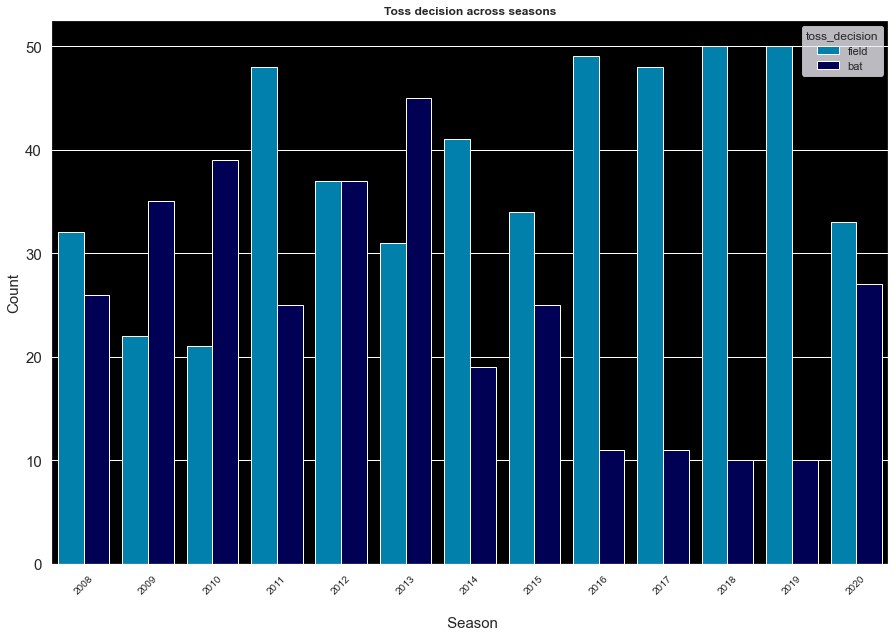

In [231]:
ax = plt.axes()
ax.set(facecolor='black')
sns.countplot(x='Season', hue='toss_decision', data=df_match, palette='ocean_r', saturation=1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Toss decision across seasons', fontsize=12, fontweight='bold')
plt.show()

In [232]:
df_match['result'].value_counts()

wickets    435
runs       364
tie         13
unknown      4
Name: result, dtype: int64

In [233]:
df_match.venue[df_match.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [234]:
df_match.venue[df_match.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [235]:
df_match.venue[df_match.result!='tie'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [236]:
df_match.venue[df_match.toss_winner=='Mumbai Indians'][df_match.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [237]:
df_match.venue[df_match.toss_winner=='Kolkata Knight Riders'][df_match.winner=='Kolkata Knight Riders'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [238]:
df_match.winner[df_match.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [239]:
df_match.winner[df_match.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

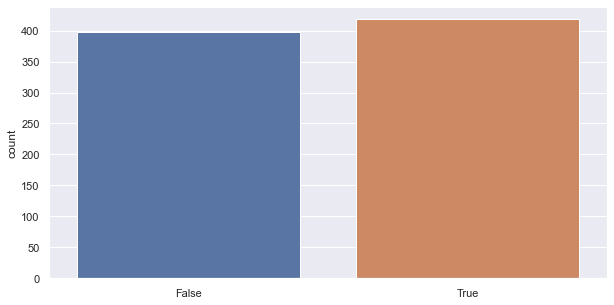

In [240]:
toss = df_match['toss_winner'] == df_match['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

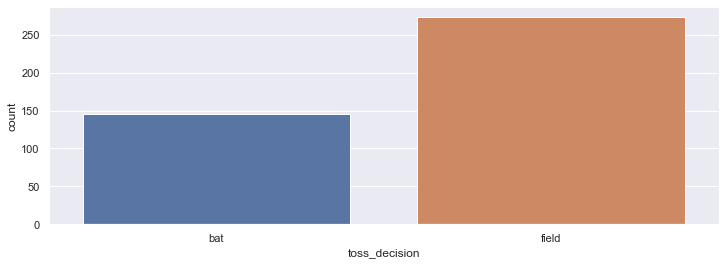

In [241]:
plt.figure(figsize=(12,4))
sns.countplot(df_match.toss_decision[df_match.toss_winner == df_match.winner])
plt.show()

In [242]:
player = (df_ball['batsman'] == 'SK Raina')
df_raina = df_ball[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,unknown,unknown,unknown,unknown,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,unknown,unknown,unknown,unknown,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,unknown,unknown,unknown,unknown,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,unknown,unknown,unknown,unknown,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,unknown,unknown,unknown,unknown,Chennai Super Kings,Kings XI Punjab


## Batting Team

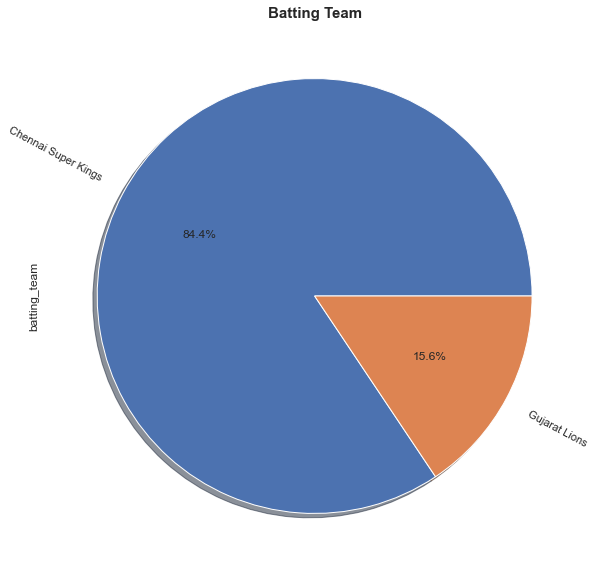

In [243]:
df_raina['batting_team'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('Batting Team', fontweight='bold', fontsize=15)
plt.show()

## Bowling Team

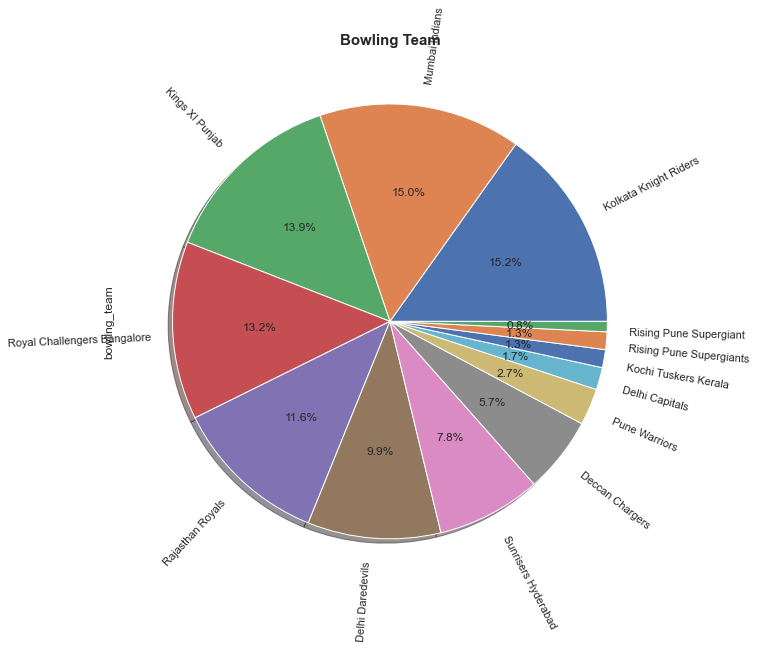

In [244]:
df_raina['bowling_team'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('Bowling Team', fontweight='bold', fontsize=15)
plt.show()

In [245]:
def count(df_raina, runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

In [246]:
print("Runs scored from 1's : ", count(df_raina, 1))
print("Runs scored from 2's : ", count(df_raina, 2))
print("Runs scored from 3's : ", count(df_raina, 3))
print("Runs scored from 4's : ", count(df_raina, 4))
print("Runs scored from 5's : ", count(df_raina, 5))

Runs scored from 1's :  1666
Runs scored from 2's :  528
Runs scored from 3's :  33
Runs scored from 4's :  1972
Runs scored from 5's :  5


In [247]:
df_match[df_match['result_margin']==df_match['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,unknown,Nitin Menon,CK Nandan,2017


In [248]:
runs = df_ball.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'runs']
y = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


## Top 10 Run Scores in IPL 2020

Text(0.5, 1.0, 'Top 10 run scores in IPL 2021')

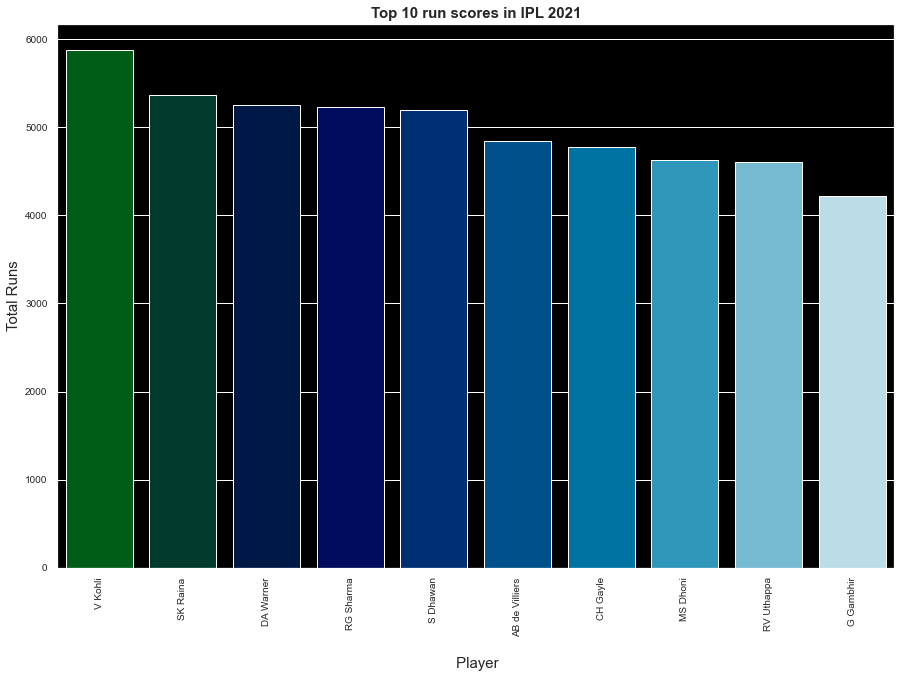

In [249]:
ax = plt.axes()
ax.set(facecolor='black')
sns.barplot(x=y['Batsman'], y=y['runs'], palette='ocean', saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player', fontsize=15)
plt.ylabel('Total Runs', fontsize=15)
plt.title('Top 10 run scores in IPL 2021', fontsize=15, fontweight='bold')

## Highest MOM Award Winners

Text(0.5, 1.0, 'Highest MOM award winners')

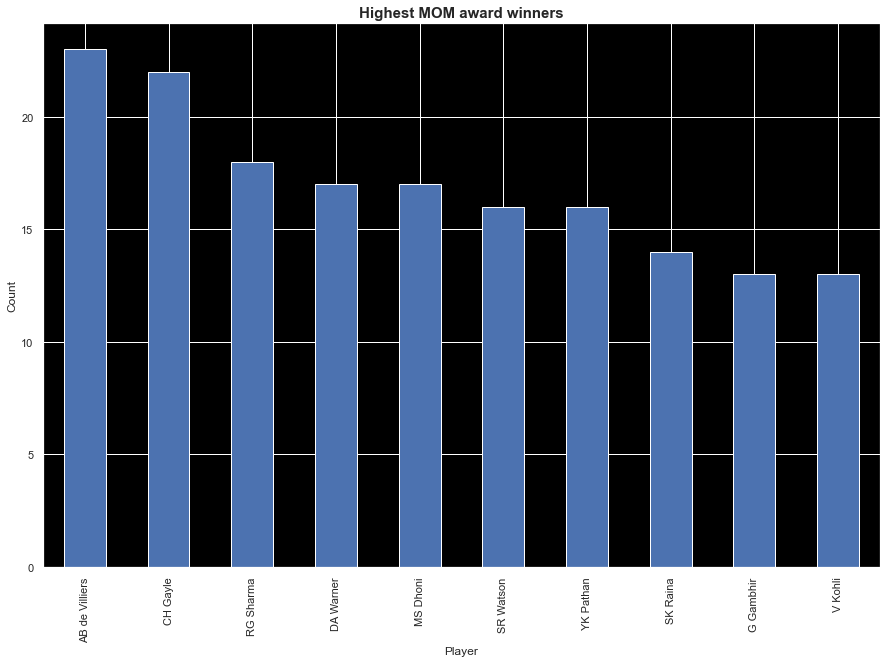

In [250]:
ax = plt.axes()
ax.set(facecolor='black')
df_match.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Highest MOM award winners', fontsize=15, fontweight='bold')